In [1]:
from ocpa.objects.log.importer.ocel import factory as ocel_import_factory

In [2]:
from ocpa.algo.discovery.ocpn import algorithm as ocpn_discovery_factory

In [3]:
from ocpa.visualization.oc_petri_net import factory as ocpn_vis_factory
from ocpa.algo.enhancement.token_replay_based_performance import algorithm as performance_factory

In [4]:
from ocpa.objects.log.importer.csv import factory as ocel_import_factory
filename = "sample_logs/csv/blood_test.csv"
object_types = ["test","sample"]
timestamp = ["start"]
parameters = {"obj_names":object_types,
              "val_names":[],
              "act_name":"activity",
              "time_name":"end",
              "start_timestamp":"start",
              "sep":","}
ocel = ocel_import_factory.apply(file_path = filename,parameters = parameters)

In [5]:
ocel

OCEL(log=Table(log=          test    sample   event_activity     event_timestamp  \
event_id                                                        
0         [T1]        []     Prepare test 2024-06-05 00:00:15   
1           []      [S1]      Take sample 2024-06-05 00:02:30   
2           []      [S2]      Take sample 2024-06-05 00:02:45   
3         [T1]  [S1, S2]     Conduct test 2024-06-05 00:04:00   
4         [T1]        []     Publish test 2024-06-05 00:05:00   
5           []  [S1, S2]  Transfer sample 2024-06-05 00:05:30   
6           []      [S1]     Clear sample 2024-06-05 00:05:45   
7           []      [S2]     Clear sample 2024-06-05 00:06:40   

         event_start_timestamp event_id  
event_id                                 
0          2024-06-05 00:00:00        0  
1          2024-06-05 00:02:00        1  
2          2024-06-05 00:02:30        2  
3          2024-06-05 00:03:00        3  
4          2024-06-05 00:04:30        4  
5          2024-06-05 00:04:45      

test getting log
[{'attributes': {'concept:name': 'T1'}, 'events': [{'event_id': '0', 'event_start_timestamp': Timestamp('2024-06-05 00:00:00'), 'time:timestamp': Timestamp('2024-06-05 00:00:15'), 'concept:name': 'Prepare test'}, '..', {'event_id': '4', 'event_start_timestamp': Timestamp('2024-06-05 00:04:30'), 'time:timestamp': Timestamp('2024-06-05 00:05:00'), 'concept:name': 'Publish test'}]}]
1
1
test got log
1
test discovered net
sample getting log
[{'attributes': {'concept:name': 'S1'}, 'events': [{'event_id': '1', 'event_start_timestamp': Timestamp('2024-06-05 00:02:00'), 'time:timestamp': Timestamp('2024-06-05 00:02:30'), 'concept:name': 'Take sample'}, '..', {'event_id': '6', 'event_start_timestamp': Timestamp('2024-06-05 00:05:30'), 'time:timestamp': Timestamp('2024-06-05 00:05:45'), 'concept:name': 'Clear sample'}]}, '....', {'attributes': {'concept:name': 'S2'}, 'events': [{'event_id': '2', 'event_start_timestamp': Timestamp('2024-06-05 00:02:30'), 'time:timestamp': Timesta

replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

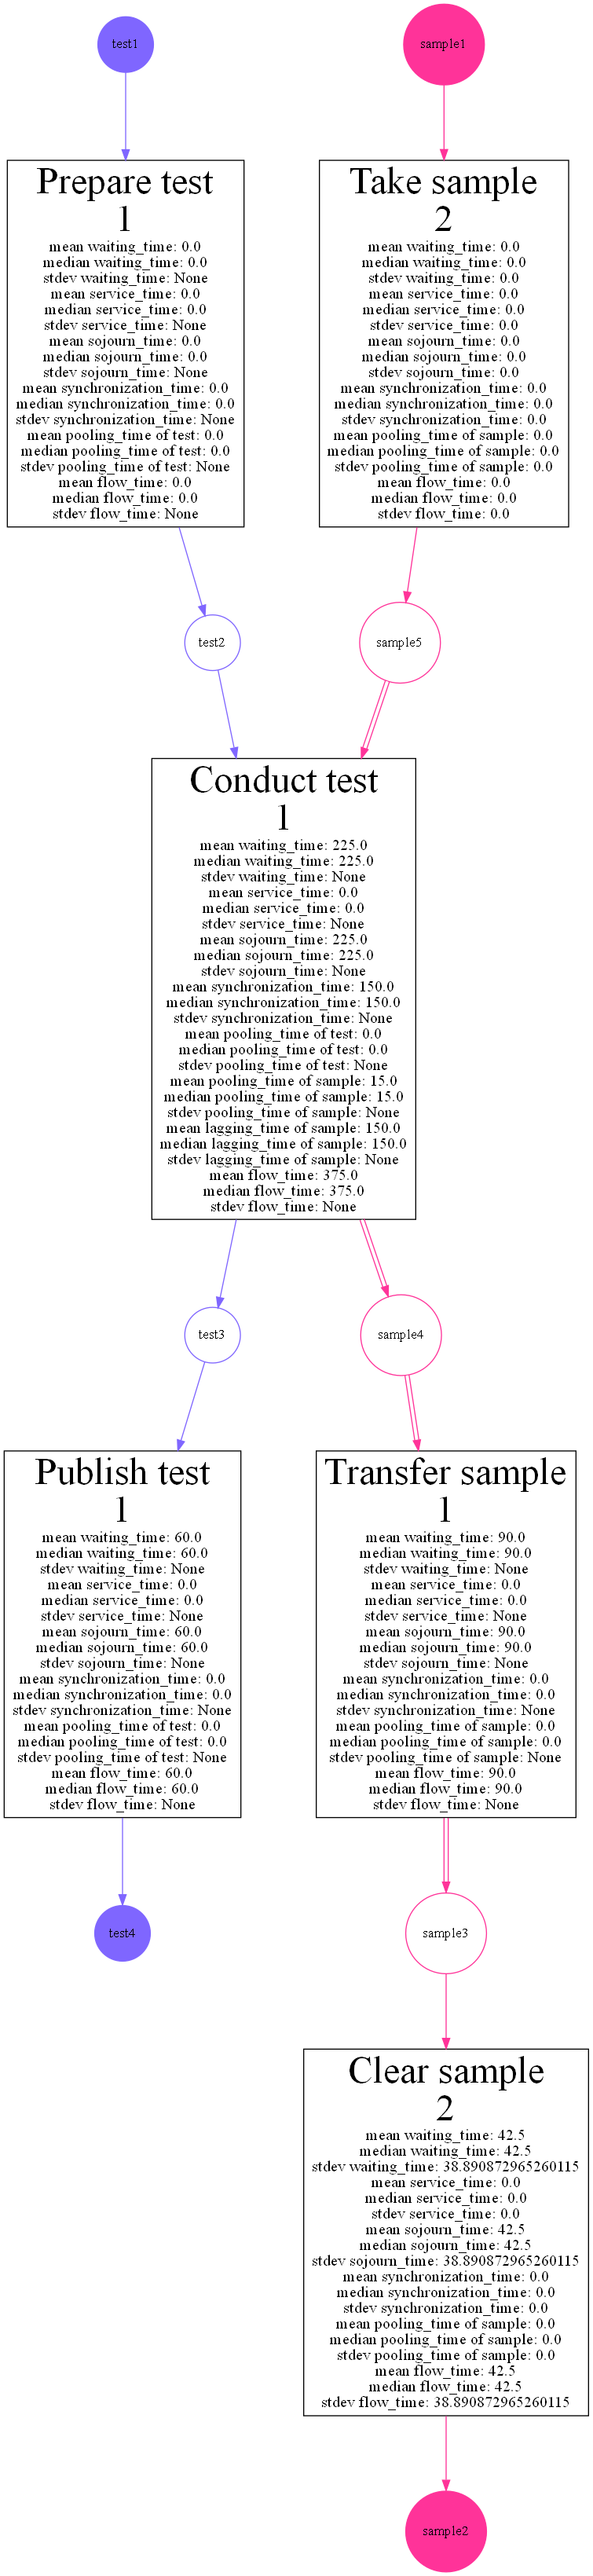

In [6]:
ocpn = ocpn_discovery_factory.apply(ocel)
diag_params = {'measures': ['waiting_time', 'service_time', 'sojourn_time', 'synchronization_time', 'pooling_time', 'lagging_time', 'flow_time'], 'agg': [
    'mean', 'median', 'stdev'], 'format': 'png'}
diag = performance_factory.apply(ocpn, ocel, parameters=diag_params)
gviz = ocpn_vis_factory.apply(ocpn)
gviz = ocpn_vis_factory.apply(
    ocpn, diagnostics=diag, variant="annotated_with_opera", parameters=diag_params)
gviz = ocpn_vis_factory.apply(
    ocpn, diagnostics=diag, variant="annotated_with_opera", parameters=diag_params)
ocpn_vis_factory.view(gviz)